# Predictive Modeling and Evaluation - Dataset 1

In this notebook, we build and evaluate a **baseline predictive model** using Logistic Regression on **Dataset 1**.  
The main goals are:  

- Prepare the data for machine learning (features, target, train/test split, scaling).  
- Train and evaluate a Logistic Regression model as the baseline.  
- Assess performance using Accuracy, Precision, Recall, F1-score, and ROC-AUC.  
- Analyze feature importance and model interpretability.  
- Establish a reference point for future comparison with models trained on Dataset 2.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, RocCurveDisplay, classification_report
from sklearn.linear_model import LogisticRegression

## 1. Data Preparation

In this section, we prepare **Dataset 1** for predictive modeling.  
The main steps include:  
- Splitting the features (`X`) and target (`y`).  
- Performing a train/test split with stratification.  
- Scaling the numerical features to ensure fair comparison across models.  
---

In [2]:
# Reading the main set - Dataset 1
data = pd.read_csv('../data/cleaned_data/dataset1_cleaned.csv')
data

,age,gender,heart_rate,pressure_high,pressure_low,glucose,kcm,troponin,heart_disease
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1311,44,1,94,122,67,204.0,1.63,0.006,0
1312,66,1,84,125,55,149.0,1.33,0.172,1
1313,45,1,85,168,104,96.0,1.24,4.250,1
1314,54,1,58,117,68,443.0,5.80,0.359,1


In [3]:
# Separate features (X) and target (y)
X = data.drop("heart_disease", axis=1)   
y = data["heart_disease"]             

# Split the dataset into training and testing sets (80/20)
# Stratify ensures class distribution is preserved in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize the scaler to standardize features (mean=0, std=1)
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)

Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       102
           1       0.83      0.83      0.83       162

    accuracy                           0.79       264
   macro avg       0.78      0.78      0.78       264
weighted avg       0.79      0.79      0.79       264



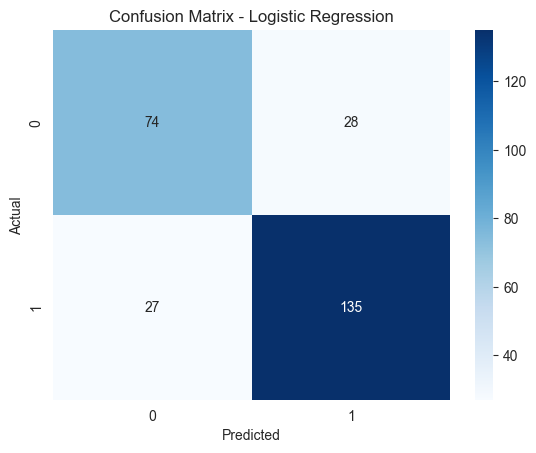

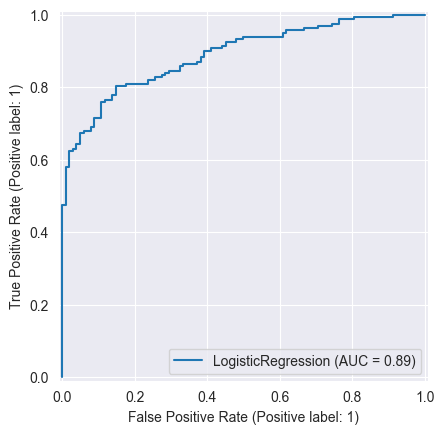

In [4]:


# Initialize logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
log_reg.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test_scaled)

# Evaluate performance
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# report = classification_report(y_test, y_pred, output_dict=True)
# dataset1_report = pd.DataFrame(report).transpose()
# dataset1_report.to_csv("../data/stats_results/logistic_regression_classification_report_ds1.csv", index=True)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(log_reg, X_test_scaled, y_test)
plt.show()

### What We Expect from the Logistic Regression Model

Before evaluating the Logistic Regression model, it is important to clarify which results we aim to obtain:

1. **Model Evaluation Metrics (Classification Report):**  
   Provides key performance indicators such as accuracy, precision, recall, and F1-score.  
   - Accuracy shows the overall correctness of predictions.  
   - Precision and recall highlight the model’s ability to correctly classify each class.  
   - F1-score balances precision and recall, especially useful in imbalanced datasets.  

2. **Confusion Matrix:**  
   Displays the number of true positives, true negatives, false positives, and false negatives.  
   - This helps us understand not only the overall performance but also the type of errors the model makes.  
   - Particularly relevant in medical data, where false negatives (missed cases) are critical.  

3. **ROC Curve and AUC (Area Under the Curve):**  
   Illustrates the trade-off between true positive rate and false positive rate at different thresholds.  
   - AUC summarizes the model’s ability to distinguish between patients with and without heart disease.  
   - Higher AUC indicates stronger discriminative power.  

Together, these three components provide a complete overview of the model’s performance:  
- **How accurate it is, where it makes mistakes, and how well it separates the classes.**  


### Interpretation of Logistic Regression Results

The baseline Logistic Regression model achieved an overall **accuracy of 79%**, which is a solid starting point for medical data classification tasks.  

- **Class 1 (heart disease = present):**  
  - Precision = 0.83 → 83% of the patients predicted as having heart disease were correctly classified.  
  - Recall = 0.83 → 83% of the actual patients with heart disease were correctly identified.  
  - F1-score = 0.83 → good balance between precision and recall.  

- **Class 0 (heart disease = absent):**  
  - Precision, recall, and F1-score are all at 0.73, slightly lower compared to Class 1.  
  - This indicates the model is better at identifying patients with heart disease than identifying healthy patients.  

**Conclusion:**  
The Logistic Regression model performs reasonably well and serves as a strong baseline. It demonstrates higher sensitivity (recall) towards detecting heart disease, which is crucial in medical applications where missing positive cases could have serious consequences. However, future models may improve the balance between both classes.  


### Interpretation of the Confusion Matrix – Logistic Regression

The confusion matrix provides detailed insight into model predictions:

- **True Negatives (TN) = 74** → Healthy patients correctly classified as healthy.  
- **False Positives (FP) = 28** → Healthy patients incorrectly classified as having heart disease.  
- **False Negatives (FN) = 27** → Patients with heart disease incorrectly classified as healthy.  
- **True Positives (TP) = 135** → Patients with heart disease correctly classified as having heart disease.  

**Key observations:**  
- The model correctly identifies **135 out of 162** patients with heart disease (high recall for Class 1).  
- There are **27 false negatives**, meaning some patients with heart disease were missed. This is critical in a medical context, as undetected patients may not receive treatment.  
- The model also produces **28 false positives**, which could lead to unnecessary further medical examinations for healthy individuals.  

**Conclusion:**  
The Logistic Regression model prioritizes detecting patients with heart disease (high sensitivity), but still misclassifies a number of healthy patients. This trade-off is acceptable as a baseline in medical diagnostics, where missing positive cases is generally more dangerous than flagging healthy individuals for further checks.  


### Interpretation of the ROC Curve – Logistic Regression

The ROC (Receiver Operating Characteristic) curve illustrates the trade-off between the **True Positive Rate (Recall)** and the **False Positive Rate** across different classification thresholds.  

- The curve for Logistic Regression rises steeply towards the top-left corner, which indicates strong discriminative power.  
- The **AUC (Area Under the Curve) = 0.89**, meaning the model has an **89% probability** of correctly distinguishing between a randomly chosen patient with heart disease and one without.  

**Key insights:**  
- AUC = 0.89 is considered **very good performance** in medical classification tasks.  
- The model achieves high sensitivity while maintaining a relatively low false positive rate.  
- The curve being well above the diagonal (random guessing line) confirms that the model performs significantly better than chance.  

**Conclusion:**  
The ROC curve confirms that Logistic Regression is an effective baseline model for this dataset, with strong ability to separate patients with and without heart disease. This validates the earlier accuracy and recall results and provides confidence in the model’s predictive capacity.  


In [5]:
# Extract and rank feature importance from Logistic Regression coefficients
# - Coefficient sign (+/-) indicates direction of impact on heart disease prediction
# - Absolute value of coefficient shows the strength of influence
# - Sorting helps us identify the most important predictors
coefficients = log_reg.coef_[0]

feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": coefficients
})

feature_importance["Abs_Coefficient"] = feature_importance["Coefficient"].abs()
feature_importance = feature_importance.sort_values(by="Abs_Coefficient", ascending=False)

feature_importance

,Feature,Coefficient,Abs_Coefficient
6,kcm,5.858179,5.858179
7,troponin,3.264660,3.264660
0,age,0.561188,0.561188
1,gender,0.206076,0.206076
5,glucose,-0.094351,0.094351
3,pressure_high,-0.054987,0.054987
4,pressure_low,0.051263,0.051263
2,heart_rate,0.009642,0.009642


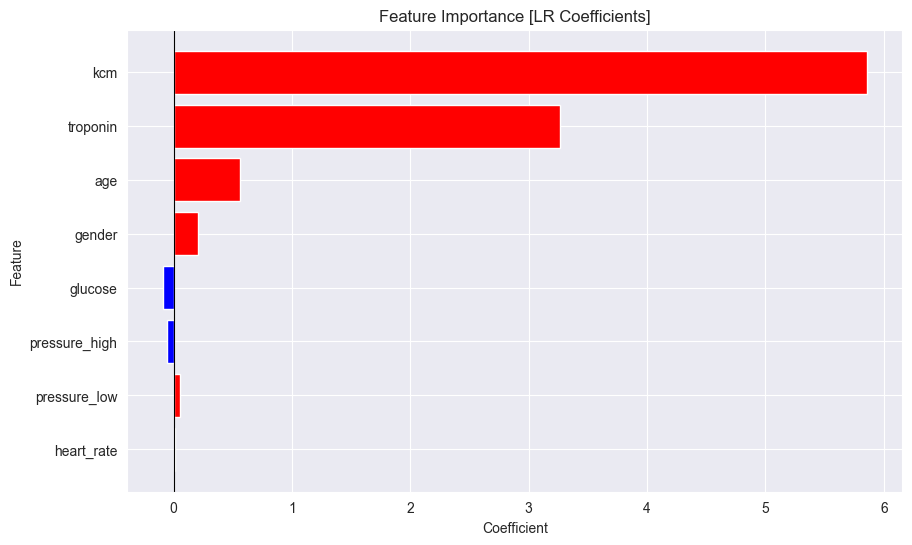

In [6]:
# Visualize the ranked feature importance from Logistic Regression
# - Features are sorted by absolute coefficient values (most important at the top)
# - Red bars indicate positive impact on heart disease prediction (higher risk)
# - Blue bars indicate negative impact (protective effect)
# - The vertical line at 0 separates positive vs negative influence
feature_importance_sorted = feature_importance.sort_values(
    by="Abs_Coefficient", ascending=True
)

plt.figure(figsize=(10,6))
plt.barh(
    feature_importance_sorted["Feature"], 
    feature_importance_sorted["Coefficient"], 
    color=["red" if c > 0 else "blue" for c in feature_importance_sorted["Coefficient"]]
)
plt.title("Feature Importance [LR Coefficients]")
plt.axvline(0, color="black", linewidth=0.8)
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.show()

In [7]:
data

,age,gender,heart_rate,pressure_high,pressure_low,glucose,kcm,troponin,heart_disease
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1311,44,1,94,122,67,204.0,1.63,0.006,0
1312,66,1,84,125,55,149.0,1.33,0.172,1
1313,45,1,85,168,104,96.0,1.24,4.250,1
1314,54,1,58,117,68,443.0,5.80,0.359,1


In [8]:
# Example new patient data (must include all features in the same order as training set)
new_data = pd.DataFrame([{
    "age": 25,
    "gender": 1,
    "heart_rate": 55,
    "pressure_high": 140,
    "pressure_low": 80,
    "glucose": 160,
    "kcm": 10,
    "troponin": 0
}])

# Scale the new data using the same scaler fitted on training data
new_data_scaled = scaler.transform(new_data)

# Predict the target (0 = no heart disease, 1 = heart disease)
prediction = log_reg.predict(new_data_scaled)
print("Prediction (0 = no disease, 1 = disease):", prediction)

# Get prediction probabilities for both classes
proba = log_reg.predict_proba(new_data_scaled)
print("Prediction Probabilities [No Disease, Disease]:", proba)


Prediction (0 = no disease, 1 = disease): [0]
Prediction Probabilities [No Disease, Disease]: [[0.6173114 0.3826886]]


# Summary

In this notebook, we successfully built and evaluated a **Logistic Regression model** on Dataset 1.  
The main achievements are:  

- **Data preparation**: split into training and test sets, scaling of numeric features.  
- **Model training**: Logistic Regression was trained as a baseline classifier.  
- **Model evaluation**: performance was assessed using a classification report, confusion matrix, and ROC curve.  
  - The model achieved ~79% accuracy with balanced precision and recall.  
- **Feature importance**: coefficients were analyzed to understand which features most strongly influence predictions.  
- **Practical demonstration**: we tested the model with new patient data, showing how it returns both the predicted class and class probabilities.  

This establishes a strong baseline for **Dataset 1**, which will serve as a reference point when comparing with models built on **Dataset 2**.
